# Analysis of Tennis Player Prize Money

#### By Harmony Allan-Mah, Brandon Hui, Leo Qu and Elena Zettelmeyer


### Introduction 

Tennis is a popular game enjoyed worldwide, with approximately 87 million players in 2019, and 973 million viewers or Association of Tennis Professionals (ATP) events in 2015 (Czermak). Because of its popularity, many recreational players may consider trying to play professionally to gain potential fame and wealth, but little is known about what exactly may lead to high earnings and success in professional Tennis. Fortunately, Ultimate Tennis Statistics contains a dataset named “Player Stats for Top 500 Players”, which provides useful information about men’s singles games, including each player’s age, the number of seasons they’ve played, their height, various forms of rankings, and the amount of prize money they earn. The dataset has a total of 500 rows (one for each player) and 38 columns consisting of various variables, but only 9 of which are of interest to us. With this data, we can get a better sense of what factors may predict financial success in men’s singles tennis. In this project, we will conduct a linear regression model to answer the predictive question: **how do tennis player’s age, seasons, height, and various rankings influence the prize money that they can make?**, using the following 9 predictors: 

- Age
- Seasons (where Seasons is the number of seasons a player has played in their career)
- Current Elo Rank (where Current Elo Rank is how a player ranks in terms of their current elo*)
- Best Elo Rank (where Best Elo Rank is how a player ranks in terms of their peak elo*)
- Peak Elo Rating (where Peak Elo Rating is the player’s highest ever elo*)
- Height
- Current Rank (where Current Rank is a player’s current ranking amongst all tennis players in the world)
- Best Rank (where Best Rank is the highest ranking a player has achieved at any point in their career)
- GOAT Rank (where GOAT Rank is a player’s ranking amongst the Greatest (tennis players) of all Time)

**Elo is an estimate of a tennis player’s general strength and ability, and is often used in the ATP.  If a player wins, their Elo increases, and vice versa.*

We will narrow down which predictors we'll use in our analysis based on the strength of their relationship with prize money earned (exact correlation coefficients and graphs shown below). We will then exclude the predictors that have low correlations with prize money, as they are unlikely to strengthen our predictions. 

This analysis is important, because it could give semi-professionals or amateurs interested in going fully professional a realistic understanding of what it would take for them to actually start earning prize money. Players with the goal of earning high amounts of money could compare their own predicted rankings with those used in the regression to determine whether it is a field worth entering, or provide concrete goals for them to train towards to achieve higher earnings. 


### Methods

We have used the following code to tidy our data and split it into our training and test sets: 

In [1]:
set.seed(2022) 

library(tidyverse)
library(tidymodels)
library(gridExtra)
library(GGally)
library(cowplot)

player_stats <- read_csv("data")

colnames(player_stats) <- make.names(colnames(player_stats), unique = TRUE)
player_stats_tidy <- player_stats |> filter(Active == "Yes", Current.Elo.Rank != "N/A", Height != "N/A", GOAT.Rank != "N/A") |> 
                                     select(Age, Seasons, Current.Elo.Rank, Best.Elo.Rank, Peak.Elo.Rating, Height, Current.Rank, Best.Rank, GOAT.Rank, Prize.Money) |> 
                                     mutate(Age = as.numeric(substr(Age, 1,2)), 
                                            Current.Rank = as.numeric(gsub("\\(.*?\\)", "", Current.Rank)),
                                            Best.Rank = as.numeric(gsub("\\(.*?\\)", "", Best.Rank)),
                                            Height = as.numeric(gsub("cm", "", Height)),
                                            Peak.Elo.Rating = as.numeric(gsub("\\(.*?\\)", "", Peak.Elo.Rating)),
                                            GOAT.Rank = as.numeric(gsub("\\(.*?\\)", "", GOAT.Rank)),
                                            Best.Elo.Rank = as.numeric(gsub("\\(.*?\\)", "", Best.Elo.Rank)),
                                            Current.Elo.Rank = as.numeric(gsub("[\\(\\)]", "", regmatches(Current.Elo.Rank, gregexpr("\\(.*?\\)", Current.Elo.Rank)))),
                                            Prize.Money = parse_number(Prize.Money))
head(player_stats_tidy, 10)

player_stats_split <- initial_split(player_stats_tidy, prop = 0.6, strata = Prize.Money)
player_stats_train <- training(player_stats_split)
player_stats_test <- testing(player_stats_split)

<<<<<<< local
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::

Age,Seasons,Current.Elo.Rank,Best.Elo.Rank,Peak.Elo.Rating,Height,Current.Rank,Best.Rank,GOAT.Rank,Prize.Money
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,11,1826,21,2037,193,183,17,264,6091971
31,14,2211,3,2329,198,121,3,33,25889586
33,14,1791,29,2004,190,130,19,264,10821168
32,15,1993,18,2068,198,45,11,157,11912152
32,16,2004,14,2112,178,12,9,151,13470614
29,11,1892,35,1962,180,27,23,357,4850190
32,13,1860,44,1946,190,161,33,357,7114496
27,11,1845,38,1953,183,304,40,489,4660132
35,18,1879,21,2029,190,85,18,293,10581476


>>>>>>> remote
Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


The table above represents the training data we will use for our prediction model. It represents a randomized portion of the original tidied data set; more specifically 60% of it. It contains 10 variables, one of which is the value we are trying to predict, prize money. We know our data is properly tidied because each column is a single variable, and each value is a single cell, where the value is a reasonable number when considering the real life applications of each variable. 

In [4]:
player_stats_means_train <- map_dbl(player_stats_train, mean) |>
                           enframe() |> 
                           arrange(value) |> 
                           mutate(training_means = value, columns = name) |> 
                           select(-value, -name)

player_stats_means_all <- map_dbl(player_stats_tidy, mean) |> 
                           enframe() |> 
                           arrange(value) |> 
                           mutate(data_means = value) |>
                           bind_cols(player_stats_means_train) |>
                           select(-name, -value)

player_stats_means_all

data_means,training_means,columns
<dbl>,<dbl>,<chr>
1.367647e+01,1.382051e+01,Seasons
1.750000e+01,1.664103e+01,Best.Rank
2.216176e+01,2.148718e+01,Best.Elo.Rank
3.154412e+01,3.158974e+01,Age
8.651471e+01,7.556410e+01,Current.Rank
1.873971e+02,1.877436e+02,Height
2.367794e+02,2.279744e+02,GOAT.Rank
1.948603e+03,1.957051e+03,Current.Elo.Rank
2.092588e+03,2.105103e+03,Peak.Elo.Rating


This table shows the means of each column for both the entire data set as well as just the training set. The data_means, overall, appear to be higher than the training_means, indicating our prediction model might underestimate some of the testing data points. 

In [5]:
player_stats_medians_train <- map_dbl(player_stats_train, median) |>
                           enframe() |> 
                           arrange(value) |> 
                           mutate(training_medians = value, columns = name) |> 
                           select(-value, -name)

player_stats_medians_all <- map_dbl(player_stats_tidy, median) |> 
                           enframe() |> 
                           arrange(value) |> 
                           mutate(data_medians = value) |>  
                           bind_cols(player_stats_medians_train) |> 
                           select(-name, -value)

player_stats_medians_all

data_medians,training_medians,columns
<dbl>,<dbl>,<chr>
13.0,14,Seasons
16.5,14,Best.Rank
21.0,21,Best.Elo.Rank
32.0,32,Age
60.5,45,Current.Rank
188.0,188,Height
249.0,222,GOAT.Rank
1932.5,1944,Current.Elo.Rank
2039.5,2062,Peak.Elo.Rating


This table shows the medians for both the entire data set and the training data. The data_medians and training_medians appear very similar in magnitude. One variable that has a skewed median is current rank, which intuitively makes sense considering some of the higher rankings could have been separated into the testing data causing a lower median. 

In [6]:
player_stats_sd_train <- map_dbl(player_stats_train, sd) |>
                           enframe() |> 
                           arrange(value) |> 
                           mutate(training_sds = value, columns = name) |> 
                           select(-value, -name)

player_stats_sd_all <- map_dbl(player_stats_tidy, sd) |> 
                           enframe() |> 
                           arrange(value) |> 
                           mutate(data_sds = value) |>  
                           bind_cols(player_stats_sd_train) |> 
                           select(-name, -value)

player_stats_sd_all

data_sds,training_sds,columns
<dbl>,<dbl>,<chr>
3.513051e+00,3.732630e+00,Age
3.534199e+00,3.824243e+00,Seasons
7.801913e+00,7.659593e+00,Height
1.247744e+01,1.193510e+01,Best.Rank
1.562872e+01,1.410650e+01,Best.Elo.Rank
7.532170e+01,7.396222e+01,Current.Rank
1.468635e+02,1.494906e+02,GOAT.Rank
1.495543e+02,1.630103e+02,Current.Elo.Rank
1.602614e+02,1.812297e+02,Peak.Elo.Rating


This table represents the standard deviation of each column in the training data and entire data set. In most cases the training data deviates more greatly, which makes intuitive sense considering a smaller data set will generally be less centered around the mean and deviate slightly more. 

In [7]:
player_cor <- cor(player_stats_tidy)
player_cor[ , 10]

Age          Seasons Current.Elo.Rank    Best.Elo.Rank 
      0.18767662       0.42030470       0.77216326      -0.50019089 
 Peak.Elo.Rating           Height     Current.Rank        Best.Rank 
      0.84909376       0.02801205      -0.32429820      -0.49511756 
       GOAT.Rank      Prize.Money 
     -0.57507299       1.00000000

Utilizing these correlation coefficients we can determine the strength of the relationships between each possible predictor and what we are trying to predict (prize money). A perfect negative relationship would be represented by a coefficient of -1, whereas a perfect positive relationship would be represented by a coefficient of +1. Although the threshold for predictors can vary between applications, we will look for numbers </= -0.5 or  </= +0.5. Looking at the coefficients for our predictors, Current.Elo.Rank, Best.Elo.Rank, Peak.Elo.Rating, Best.Rank and GOAT.Rank have the highest coefficients that fit the description of being lower than -0.5 or higher than +0.5. Therefore these are the predictors that will be chosen for our best linear regression model. 

In [6]:
player_age_plot <- ggplot(player_stats_train, aes(x = Age, y = Prize.Money)) +
  geom_point() +
  xlab("Age of Player (years)") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 15))

player_seasons_plot <- ggplot(player_stats_train, aes(x = Seasons, y = Prize.Money)) +
  geom_point() +
  xlab("Total Seasons Played") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 15))

player_current_elo_plot <- ggplot(player_stats_train, aes(x = Current.Elo.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Current Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 15)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_best_elo_plot <- ggplot(player_stats_train, aes(x = Best.Elo.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Best Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 15)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_peak_elo_plot <- ggplot(player_stats_train, aes(x = Peak.Elo.Rating, y = Prize.Money)) +
  geom_point() +
  xlab("Peak Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 15)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_height_plot <- ggplot(player_stats_train, aes(x = Height, y = Prize.Money)) +
  geom_point() +
  xlab("Height of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 15))

player_current_rank_plot <- ggplot(player_stats_train, aes(x = Current.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Current Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 15))

player_best_rank_plot <- ggplot(player_stats_train, aes(x = Best.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Best Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 15))

player_goat_rank_plot <- ggplot(player_stats_train, aes(x = GOAT.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("GOAT Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 15))

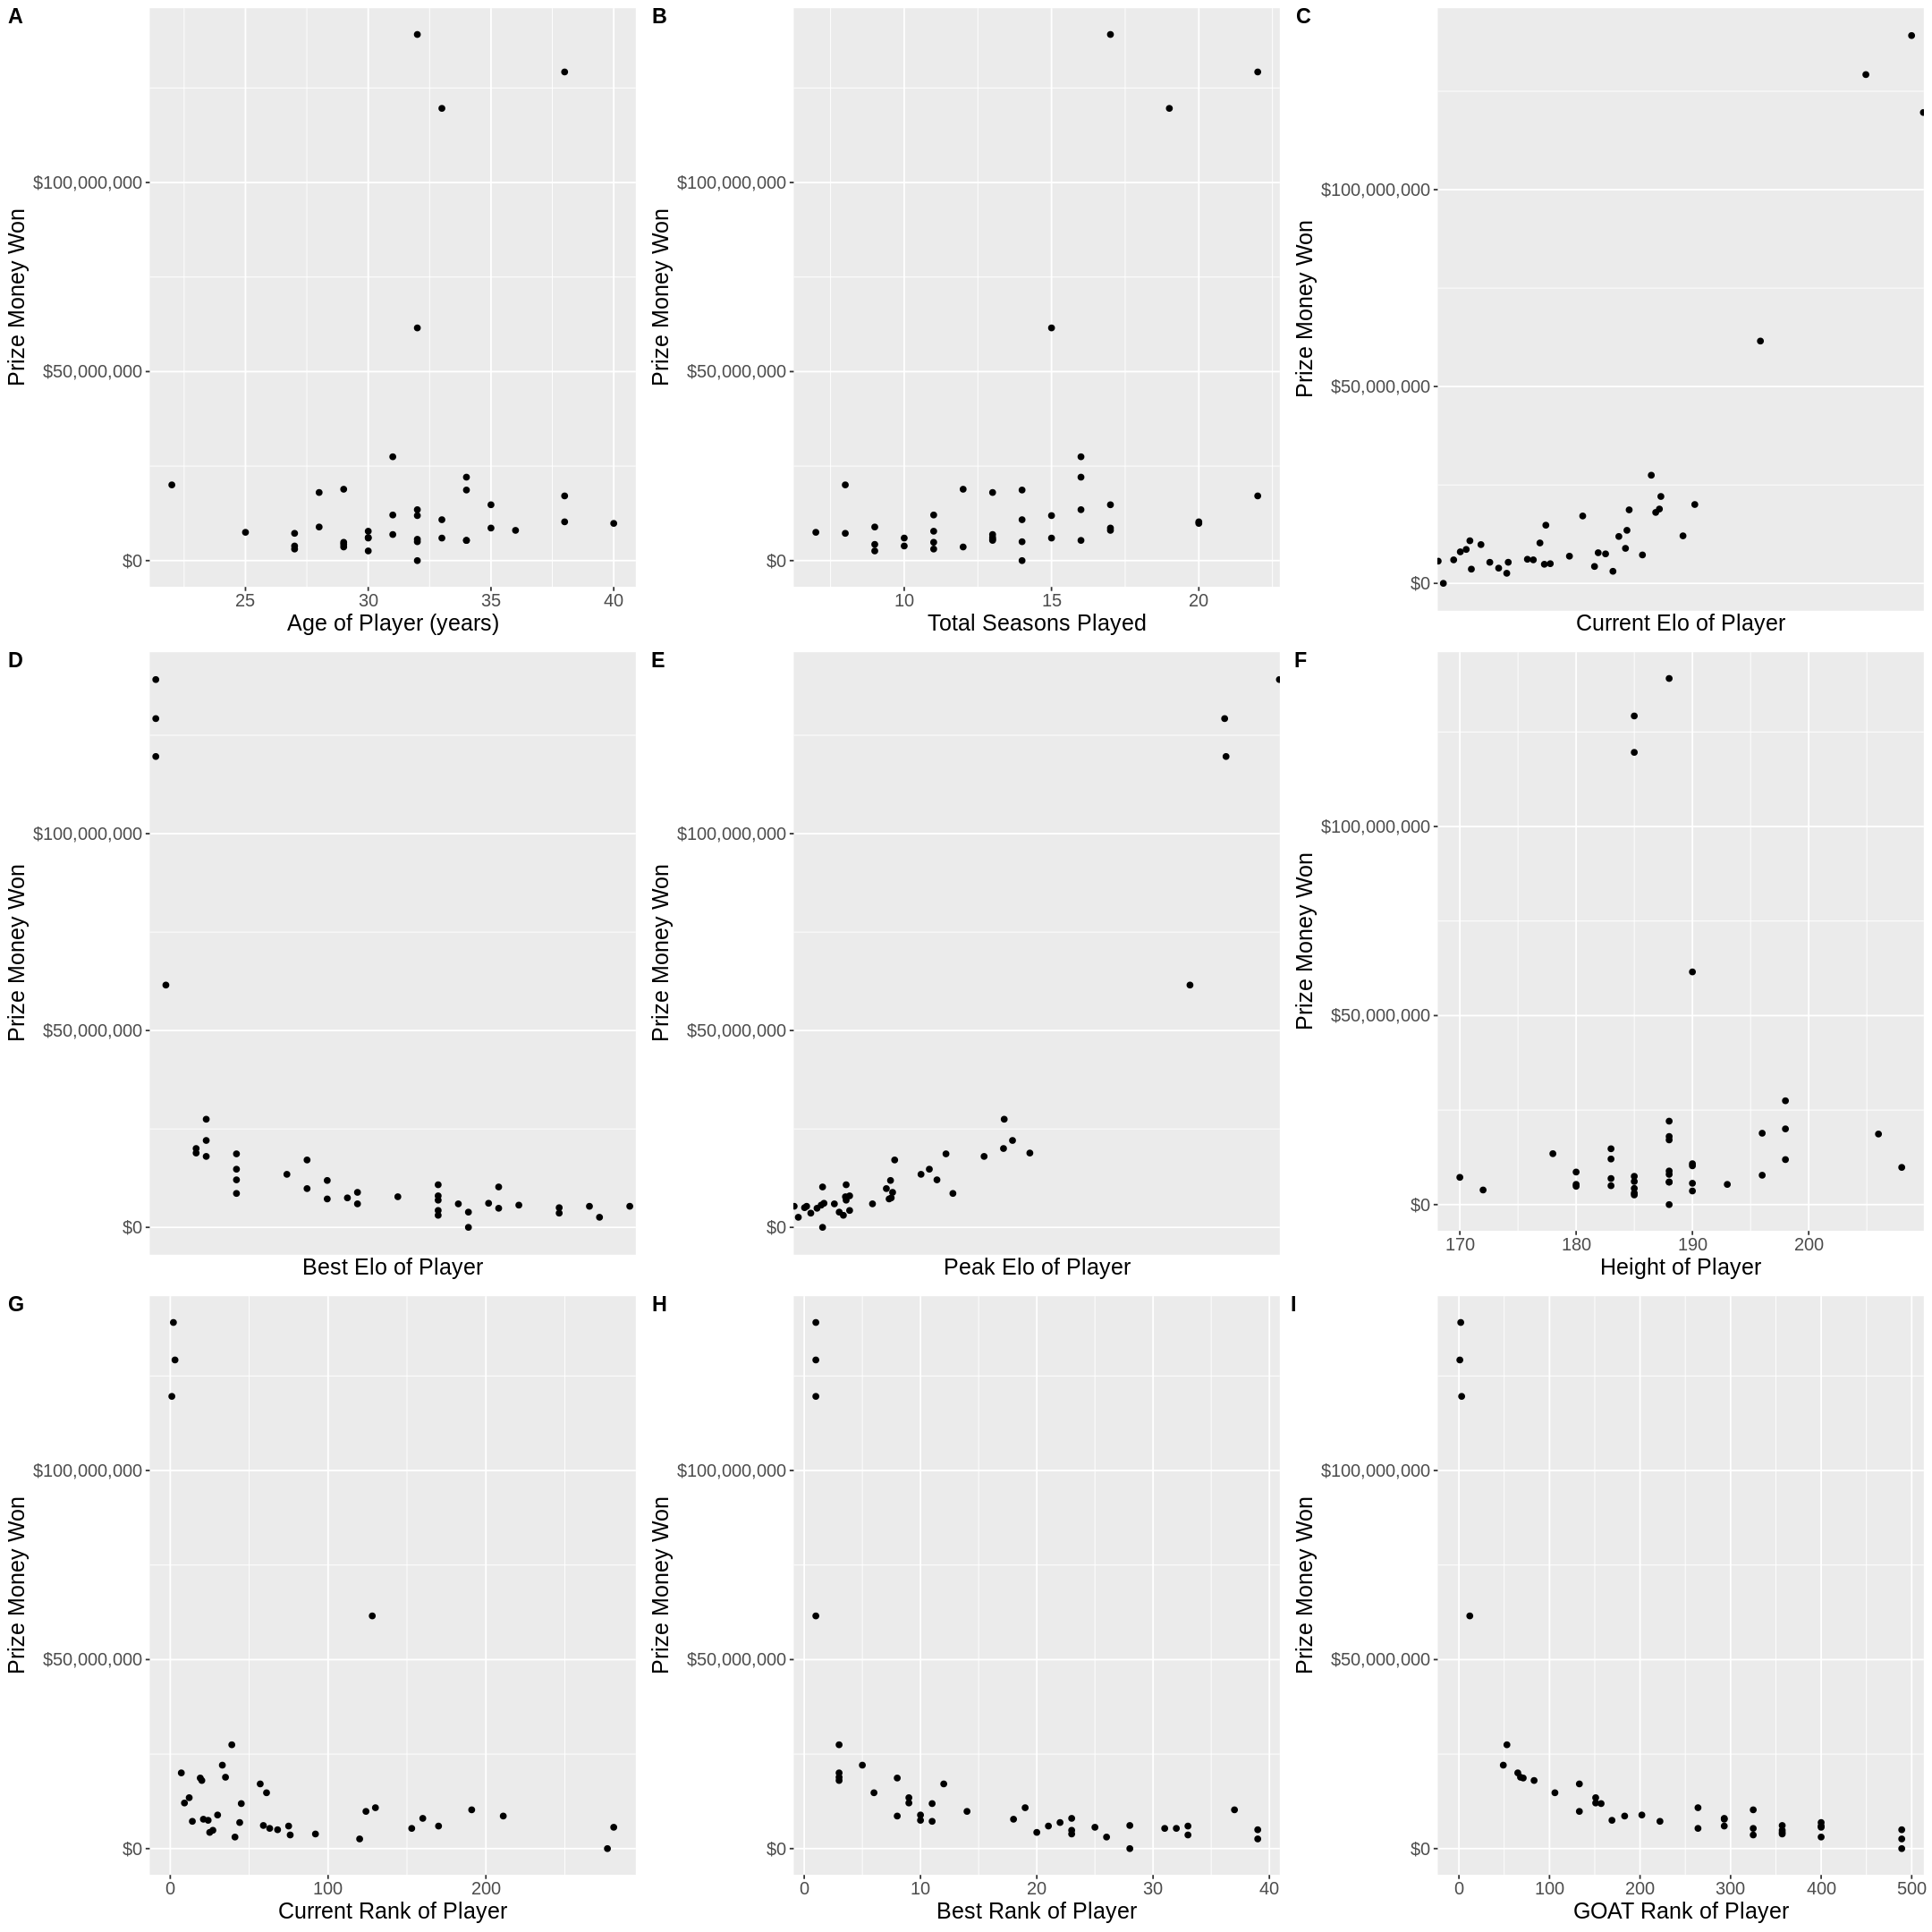

In [9]:
options(repr.plot.width= 18, repr.plot.height= 18)
plot_grid(player_age_plot, player_seasons_plot, player_current_elo_plot, player_best_elo_plot, player_peak_elo_plot,
          player_height_plot, player_current_rank_plot, player_best_rank_plot, player_goat_rank_plot, labels = "AUTO")

- Plot A shows that the correlation between age and prize money is weak (r = 0.19). This predictor will not be included in our best linear regression model.
- Plot B shows that the correlation between seasons and prize money is weak (r = 0.42). This predictor will not be included in our best linear regression model.
- Plot C shows that the correlation between current elo and prize money is strong and positive (r = 0.77). This predictor will be included in our best linear regression model.
- Plot D shows that the correlation between best elo and prize money is fairly strong and negative (r = -0.5). This predictor will be included in our best linear regression model.
- Plot E shows that the correlation between peak elo and prize money is strong and positive ( r = 0.85). This predictor will be included in our best linear regression model.
- Plot F shows that the correlation between height and prize money is weak (r = 0.03). This predictor will not be included in our best linear regression model.
- Plot G shows that the correlation between current rank and prize money is weak (r = -0.32). This predictor will not be included in our best linear regression model.
- Plot H shows that the correlation between best rank and prize money is fairly strong and negative (r = -0.5). This predictor will be included in our best linear regression model.
- Plot I shows that the correlation between GOAT rank and prize money is strong and negative (r = -0.58). This predictor will be included in our best linear regression model.

In [20]:
set.seed(2022) 

lm_spec <- linear_reg() |> set_engine("lm") |> set_mode("regression")

tennis_recipe_all <- recipe(
    Prize.Money ~ ., data = player_stats_train)

tennis_fit_all <- workflow() |> add_recipe(tennis_recipe_all) |>
                            add_model(lm_spec) |> 
                            fit(player_stats_train)
tennis_fit_all

lm_rmse_all <- tennis_fit_all |> predict(player_stats_train) |>
                         bind_cols(player_stats_train) |>
                         metrics(truth = Prize.Money, estimate = .pred) |> 
                         filter(.metric == "rmse") |>
                         select(.estimate) |>
                         pull()
lm_rmse_all

lm_rmspe_all <- tennis_fit_all |> predict(player_stats_test) |>
                          bind_cols(player_stats_test) |> 
                          metrics(truth = Prize.Money, estimate = .pred) |> 
                          filter(.metric == "rmse") |>
                          select(.estimate) |> 
                          pull()

lm_rmspe_all

tennis_recipe_best <- recipe(
    Prize.Money ~ Current.Elo.Rank + Best.Elo.Rank + Peak.Elo.Rating + GOAT.Rank + Best.Rank, 
    data = player_stats_train)

tennis_fit_best <- workflow() |> add_recipe(tennis_recipe_best) |>
                            add_model(lm_spec) |> 
                            fit(player_stats_train)

tennis_fit_best

lm_rmse_best <- tennis_fit_best |> predict(player_stats_train) |>
                         bind_cols(player_stats_train) |>
                         metrics(truth = Prize.Money, estimate = .pred) |> 
                         filter(.metric == "rmse") |>
                         select(.estimate) |>
                         pull()
lm_rmse_best

lm_rmspe_best <- tennis_fit_best |> predict(player_stats_test) |>
                          bind_cols(player_stats_test) |> 
                          metrics(truth = Prize.Money, estimate = .pred) |> 
                          filter(.metric == "rmse") |>
                          select(.estimate) |> 
                          pull()
lm_rmspe_best

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)               Age           Seasons  Current.Elo.Rank  
      -613108014            824089           1361785             33997  
   Best.Elo.Rank   Peak.Elo.Rating            Height      Current.Rank  
         1465687            227520             57917            -51680  
       Best.Rank         GOAT.Rank  
         -617175             65233  


[1] 6940181

[1] 11129017

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)  Current.Elo.Rank     Best.Elo.Rank   Peak.Elo.Rating  
      -560925421             33257           1090041            231229  
       GOAT.Rank         Best.Rank  
           -2997            398694  


[1] 8999245

[1] 11161388

>> insert method and results

>> insert discussion

**MLA Cited References**

Flake, Collin R., et al. “Advantage Men: The Sex Pay Gap in Professional Tennis .” International Review for the Sociology of Sport , vol. 48, no. 3, SAGE Publications , 2013, pp. 366–76, doi:10.1177/1012690212442166 .
 
Jenkat, Rahul. “Tennis Rules: Know How to Play.” Olympics.com, International Olympic Committee, 1 Aug. 2022, https://olympics.com/en/news/tennis-rules-regulations-how-to-play-basics. 

Jeff, Author. “An Introduction to Tennis Elo.” Heavy Topspin, 3 Dec. 2019, http://www.tennisabstract.com/blog/2019/12/03/an-introduction-to-tennis-elo/. 

Šimić, Vladimir. “Prize Money Earnings of Tennis Professionals and the Impact of COVID-19 Pandemic .” International Journal of Business and Economic Sciences Applied Research , vol. 14, no. 1, Eastern Macedonia and Thrace Institute of Technology , 2021, pp. 47–57, doi:10.25103/ijbesar.141.04 .

Ultimate Tennis Statistics, https://www.ultimatetennisstatistics.com/. 